In [56]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '78563183-57b1-42a7-88ff-9948a7c85a1a',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10

{'status': {'timestamp': '2024-09-20T11:39:37.690Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 9810}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11705, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [57]:
type(data)

dict

In [58]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [59]:
df = pd.json_normalize(data['data'])
df["timestamp"] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11705,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19756571.00000,19756571.00000,False,NaN,1,NaN,NaN,None,2024-09-20T11:38:00.000Z,63455.37308,41652810682.08894,-11.37210,-0.06321,1.44112,9.09814,6.76687,-5.89924,-1.21873,1253660583682.06201,56.88560,1332562834781.57007,None,2024-09-20T11:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 17:09:43.623345
1,1027,Ethereum,ETH,ethereum,9334,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120345932.99257,120345932.99257,True,NaN,2,NaN,NaN,None,2024-09-20T11:38:00.000Z,2541.38079,19759510234.78468,-5.78350,-0.37885,4.69215,7.42439,-1.59756,-27.26704,-27.23713,305844842515.12469,13.88280,305844842515.12000,None,2024-09-20T11:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 17:09:43.623345
2,825,Tether USDt,USDT,tether,98142,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119072842113.35646,121386817751.62444,True,NaN,3,NaN,NaN,None,2024-09-20T11:38:00.000Z,1.00011,69402883538.65811,-4.94280,-0.00951,-0.00144,0.01609,-0.00089,0.00188,0.06870,119085628422.82304,5.40470,121399852541.00000,None,2024-09-20T11:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-20 17:09:43.623345
3,1839,BNB,BNB,bnb,2239,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145933680.49080,145933680.49080,False,NaN,4,NaN,NaN,None,2024-09-20T11:37:00.000Z,567.19108,1958785969.37797,9.77660,-0.63883,1.70125,3.46399,2.00488,-5.05759,-3.35100,82772282502.18600,3.75660,82772282502.19000,None,2024-09-20T11:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 17:09:43.623345
4,5426,Solana,SOL,solana,738,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,468491275.86957,584919895.37145,True,NaN,5,NaN,NaN,None,2024-09-20T11:38:00.000Z,150.31212,3358264954.64035,13.56710,-0.11597,8.18709,12.67760,5.98210,-16.62919,12.17775,70419918343.89040,3.19620,87920551334.33000,None,2024-09-20T11:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 17:09:43.623345
5,3408,USDC,USDC,usd-coin,22149,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,35551555231.11601,35551555231.11601,False,NaN,6,NaN,NaN,None,2024-09-20T11:37:00.000Z,0.99988,6858446310.43657,-15.71780,-0.01597,-0.00776,-0.00166,0.00394,-0.02445,-0.00907,35547181307.14314,1.61340,35547181307.14000,None,2024-09-20T11:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-20 17:09:43.623345
6,52,XRP,XRP,xrp,1392,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56434507880.00000,99987205428.00000,False,NaN,7,NaN,NaN,None,2024-09-20T11:38:00.000Z,0.58514,1301186843.63902,1.34740,-0.17848,0.02005,3.42481,-2.16687,-3.83150,20.51585,33022142239.30746,1.49870,58514096214.90000,None,2024-09-20T11:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 17:09:43.623345
7,74,Dogecoin,DOGE,dogecoin,1068,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146034036383.70520,146034036383.70520,True,NaN,8,NaN,NaN,None,2024-09-20T11:38:00.000Z,0.10582,666902605.46686,-0.25620,-0.74498,1.43605,0.34944,1.76491,-23.29449,-14.92958,15453254307.33172,0.70130,15453254307.33000,None,2024-09-20T11:38:00.000Z,NaN,NaN,

In [60]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '78563183-57b1-42a7-88ff-9948a7c85a1a',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
    df = pd.json_normalize(data['data'])
    df["timestamp"] = pd.to_datetime('now')
    #df_append = pd.DataFrame(df2)
    #df = pd.concat([df2,df_append])
    df

    if not os.path.isfile(r'D:\Projects\API.csv'):
        df.to_csv(r'D:\Projects\API.csv', header='column_names')
    else:
        df.to_csv(r'D:\Projects\API.csv', mode='a', header=False)

In [61]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(5) #Sleep for 1 minute
exit()

{'status': {'timestamp': '2024-09-20T11:39:48.022Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 9810}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11705, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [62]:
df1 = pd.read_csv(r'D:\Projects\API.csv')
df1

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11705,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19756515.00000,19756515.00000,False,NaN,1,NaN,NaN,NaN,2024-09-20T08:50:00.000Z,63319.16211,42151790476.85485,-10.57650,-0.37998,2.22324,9.09893,6.30776,-5.64482,-1.53050,1250965975931.95020,56.78350,1329702404223.15991,NaN,2024-09-20T08:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 14:21:37.775668
1,1,1027,Ethereum,ETH,ethereum,9324,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120345932.99257,120345932.99257,True,NaN,2,NaN,NaN,NaN,2024-09-20T08:49:00.000Z,2547.35906,19862921495.84409,-6.74860,-0.57272,4.67167,8.53885,-1.59278,-26.76216,-26.93870,306564302322.07312,13.90730,306564302322.07001,NaN,2024-09-20T08:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 14:21:37.775668
2,2,825,Tether USDt,USDT,tether,98047,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,119072842113.35646,121386817751.62444,True,NaN,3,NaN,NaN,NaN,2024-09-20T08:50:00.000Z,1.00008,69483084826.08269,-4.94380,0.01323,0.00377,-0.00358,-0.00351,-0.01647,0.06687,119082957245.20088,5.40460,121397129453.64000,NaN,2024-09-20T08:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-20 14:21:37.775668
3,3,1839,BNB,BNB,bnb,2237,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145933704.80977,145933704.80977,False,NaN,4,NaN,NaN,NaN,2024-09-20T08:49:00.000Z,571.33558,1935296905.29681,8.63400,-0.22555,3.10686,5.53408,2.66142,-3.66457,-2.64811,83377118235.98233,3.78410,83377118235.98000,NaN,2024-09-20T08:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 14:21:37.775668
4,4,5426,Solana,SOL,solana,737,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,468491597.85477,584920098.68493,True,NaN,5,NaN,NaN,NaN,2024-09-20T08:49:00.000Z,151.03013,3271219747.49770,8.31790,0.45602,8.97878,12.71984,6.03548,-14.85861,12.55494,70756348057.79012,3.21060,88340559954.67000,NaN,2024-09-20T08:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 14:21:37.775668
5,5,3408,USDC,USDC,usd-coin,22145,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,35558401799.64324,35558401799.64324,False,NaN,6,NaN,NaN,NaN,2024-09-20T08:49:00.000Z,0.99995,6978879607.69569,-13.85090,0.00043,-0.01318,0.00026,-0.00294,-0.02865,-0.00095,35556583669.85904,1.61340,35556583669.86000,NaN,2024-09-20T08:49:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-20 14:21:37.775668
6,6,52,XRP,XRP,xrp,1391,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,56434507880.00000,99987205428.00000,False,NaN,7,NaN,NaN,NaN,2024-09-20T08:50:00.000Z,0.58907,1325381282.04177,5.15880,-0.03362,1.06866,4.08699,-1.44565,-0.68732,21.42333,33243743944.87868,1.50880,58906766788.09000,NaN,2024-09-20T08:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 14:21:37.775668
7,7,74,Dogecoin,DOGE,dogecoin,1067,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,146032316383.70508,146032316383.70508,True,NaN,8,NaN,NaN,NaN,2024-09-20T08:50:00.000Z,0.10646,659725195.06510,-0.19220,-0.06100,1.96432,2.11910,2.03857,-22.40594,-13.97334,15547079974.58608,0.70560,15547079974.59000,NaN,2024-09-20T08:50:00.000Z,

In [63]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11705,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19756571.00000,19756571.00000,False,NaN,1,NaN,NaN,None,2024-09-20T11:38:00.000Z,63455.37308,41652810682.08894,-11.37210,-0.06321,1.44112,9.09814,6.76687,-5.89924,-1.21873,1253660583682.06201,56.88560,1332562834781.57007,None,2024-09-20T11:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 17:09:55.101263
1,1027,Ethereum,ETH,ethereum,9334,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120345932.99257,120345932.99257,True,NaN,2,NaN,NaN,None,2024-09-20T11:38:00.000Z,2541.38079,19759510234.78468,-5.78350,-0.37885,4.69215,7.42439,-1.59756,-27.26704,-27.23713,305844842515.12469,13.88280,305844842515.12000,None,2024-09-20T11:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 17:09:55.101263
2,825,Tether USDt,USDT,tether,98142,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119072842113.35646,121386817751.62444,True,NaN,3,NaN,NaN,None,2024-09-20T11:38:00.000Z,1.00011,69402883538.65811,-4.94280,-0.00951,-0.00144,0.01609,-0.00089,0.00188,0.06870,119085628422.82304,5.40470,121399852541.00000,None,2024-09-20T11:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-20 17:09:55.101263
3,1839,BNB,BNB,bnb,2239,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145933680.49080,145933680.49080,False,NaN,4,NaN,NaN,None,2024-09-20T11:37:00.000Z,567.19108,1958785969.37797,9.77660,-0.63883,1.70125,3.46399,2.00488,-5.05759,-3.35100,82772282502.18600,3.75660,82772282502.19000,None,2024-09-20T11:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 17:09:55.101263
4,5426,Solana,SOL,solana,738,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,468491275.86957,584919895.37145,True,NaN,5,NaN,NaN,None,2024-09-20T11:38:00.000Z,150.31212,3358264954.64035,13.56710,-0.11597,8.18709,12.67760,5.98210,-16.62919,12.17775,70419918343.89040,3.19620,87920551334.33000,None,2024-09-20T11:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 17:09:55.101263
5,3408,USDC,USDC,usd-coin,22149,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,35551555231.11601,35551555231.11601,False,NaN,6,NaN,NaN,None,2024-09-20T11:37:00.000Z,0.99988,6858446310.43657,-15.71780,-0.01597,-0.00776,-0.00166,0.00394,-0.02445,-0.00907,35547181307.14314,1.61340,35547181307.14000,None,2024-09-20T11:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-20 17:09:55.101263
6,52,XRP,XRP,xrp,1392,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56434507880.00000,99987205428.00000,False,NaN,7,NaN,NaN,None,2024-09-20T11:38:00.000Z,0.58514,1301186843.63902,1.34740,-0.17848,0.02005,3.42481,-2.16687,-3.83150,20.51585,33022142239.30746,1.49870,58514096214.90000,None,2024-09-20T11:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 17:09:55.101263
7,74,Dogecoin,DOGE,dogecoin,1068,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146034036383.70520,146034036383.70520,True,NaN,8,NaN,NaN,None,2024-09-20T11:38:00.000Z,0.10582,666902605.46686,-0.25620,-0.74498,1.43605,0.34944,1.76491,-23.29449,-14.92958,15453254307.33172,0.70130,15453254307.33000,None,2024-09-20T11:38:00.000Z,NaN,NaN,

In [64]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [65]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11705,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19756571.00000,19756571.00000,False,NaN,1,NaN,NaN,None,2024-09-20T11:38:00.000Z,63455.37308,41652810682.08894,-11.37210,-0.06321,1.44112,9.09814,6.76687,-5.89924,-1.21873,1253660583682.06201,56.88560,1332562834781.57007,None,2024-09-20T11:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 17:09:55.101263
1,1027,Ethereum,ETH,ethereum,9334,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120345932.99257,120345932.99257,True,NaN,2,NaN,NaN,None,2024-09-20T11:38:00.000Z,2541.38079,19759510234.78468,-5.78350,-0.37885,4.69215,7.42439,-1.59756,-27.26704,-27.23713,305844842515.12469,13.88280,305844842515.12000,None,2024-09-20T11:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 17:09:55.101263
2,825,Tether USDt,USDT,tether,98142,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119072842113.35646,121386817751.62444,True,NaN,3,NaN,NaN,None,2024-09-20T11:38:00.000Z,1.00011,69402883538.65811,-4.94280,-0.00951,-0.00144,0.01609,-0.00089,0.00188,0.06870,119085628422.82304,5.40470,121399852541.00000,None,2024-09-20T11:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-20 17:09:55.101263
3,1839,BNB,BNB,bnb,2239,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145933680.49080,145933680.49080,False,NaN,4,NaN,NaN,None,2024-09-20T11:37:00.000Z,567.19108,1958785969.37797,9.77660,-0.63883,1.70125,3.46399,2.00488,-5.05759,-3.35100,82772282502.18600,3.75660,82772282502.19000,None,2024-09-20T11:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 17:09:55.101263
4,5426,Solana,SOL,solana,738,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,468491275.86957,584919895.37145,True,NaN,5,NaN,NaN,None,2024-09-20T11:38:00.000Z,150.31212,3358264954.64035,13.56710,-0.11597,8.18709,12.67760,5.98210,-16.62919,12.17775,70419918343.89040,3.19620,87920551334.33000,None,2024-09-20T11:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 17:09:55.101263
5,3408,USDC,USDC,usd-coin,22149,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,35551555231.11601,35551555231.11601,False,NaN,6,NaN,NaN,None,2024-09-20T11:37:00.000Z,0.99988,6858446310.43657,-15.71780,-0.01597,-0.00776,-0.00166,0.00394,-0.02445,-0.00907,35547181307.14314,1.61340,35547181307.14000,None,2024-09-20T11:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-20 17:09:55.101263
6,52,XRP,XRP,xrp,1392,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56434507880.00000,99987205428.00000,False,NaN,7,NaN,NaN,None,2024-09-20T11:38:00.000Z,0.58514,1301186843.63902,1.34740,-0.17848,0.02005,3.42481,-2.16687,-3.83150,20.51585,33022142239.30746,1.49870,58514096214.90000,None,2024-09-20T11:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 17:09:55.101263
7,74,Dogecoin,DOGE,dogecoin,1068,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146034036383.70520,146034036383.70520,True,NaN,8,NaN,NaN,None,2024-09-20T11:38:00.000Z,0.10582,666902605.46686,-0.25620,-0.74498,1.43605,0.34944,1.76491,-23.29449,-14.92958,15453254307.33172,0.70130,15453254307.33000,None,2024-09-20T11:38:00.000Z,NaN,NaN,

In [66]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.06321,1.44112,9.09814,6.76687,-5.89924,-1.21873
Ethereum,-0.37885,4.69215,7.42439,-1.59756,-27.26704,-27.23713
Tether USDt,-0.00951,-0.00144,0.01609,-0.00089,0.00188,0.06870
BNB,-0.63883,1.70125,3.46399,2.00488,-5.05759,-3.35100
Solana,-0.11597,8.18709,12.67760,5.98210,-16.62919,12.17775
USDC,-0.01597,-0.00776,-0.00166,0.00394,-0.02445,-0.00907
XRP,-0.17848,0.02005,3.42481,-2.16687,-3.83150,20.51585
Dogecoin,-0.74498,1.43605,0.34944,1.76491,-23.29449,-14.92958
Toncoin,-1.09710,-1.71202,2.14725,-15.60790,-19.41831,-20.65050


In [67]:
df4 = df3.stack()
df4
type(df4)

pandas.core.series.Series

In [68]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.06321
             quote.USD.percent_change_24h   1.44112
             quote.USD.percent_change_7d    9.09814
             quote.USD.percent_change_30d   6.76687
             quote.USD.percent_change_60d  -5.89924
             quote.USD.percent_change_90d  -1.21873
Ethereum     quote.USD.percent_change_1h   -0.37885
             quote.USD.percent_change_24h   4.69215
             quote.USD.percent_change_7d    7.42439
             quote.USD.percent_change_30d  -1.59756
             quote.USD.percent_change_60d -27.26704
             quote.USD.percent_change_90d -27.23713
Tether USDt  quote.USD.percent_change_1h   -0.00951
             quote.USD.percent_change_24h  -0.00144
             quote.USD.percent_change_7d    0.01609
             quote.USD.percent_change_30d  -0.00089
             quote.USD.percent_change_60d   0.00188
             quote.USD.percent_change_90d   0.06870
BNB          quote.USD.percent_change_1h   -0.63883
             quote.USD.percent_change_24h   1.70125
             quote.USD.percent_change_7d    3.46399
             quote.USD.percent_change_30d   2.00488
             quote.USD.percent_change_60d  -5.05759
             quote.USD.percent_change_90d  -3.35100
Solana       quote.USD.percent_change_1h   -0.11597
             quote.USD.percent_change_24h   8.18709
             quote.USD.percent_change_7d   12.67760
             quote.USD.percent_change_30d   5.98210
             quote.USD.percent_change_60d -16.62919
             quote.USD.percent_change_90d  12.17775
USDC         quote.USD.percent_change_1h   -0.01597
             quote.USD.percent_change_24h  -0.00776
             quote.USD.percent_change_7d   -0.00166
             quote.USD.percent_change_30d   0.00394
             quote.USD.percent_change_60d  -0.02445
             quote.USD.percent_change_90d  -0.00907
XRP          quote.USD.percent_change_1h   -0.17848
             quote.USD.percent_change_24h   0.02005
             quote.USD.percent_change_7d    3.42481
             quote.USD.percent_change_30d  -2.16687
             quote.USD.percent_change_60d  -3.83150
             quote.USD.percent_change_90d  20.51585
Dogecoin     quote.USD.percent_change_1h   -0.74498
             quote.USD.percent_change_24h   1.43605
             quote.USD.percent_change_7d    0.34944
             quote.USD.percent_change_30d   1.76491
             quote.USD.percent_change_60d -23.29449
             quote.USD.percent_change_90d -14.92958
Toncoin      quote.USD.percent_change_1h   -1.09710
             quote.USD.percent_change_24h  -1.71202
             quote.USD.percent_change_7d    2.14725
             quote.USD.percent_change_30d -15.60790
             quote.USD.percent_change_60d -19.41831
             quote.USD.percent_change_90d -20.65050
TRON         quote.USD.percent_change_1h   -0.00172
             quote.USD.percent_change_24h   1.03961
             quote.USD.percent_change_7d    0.69355
             quote.USD.percent_change_30d  -8.09631
             quote.USD.percent_change_60d  12.97429
             quote.USD.percent_change_90d  27.38695
Cardano      quote.USD.percent_change_1h   -0.61494
             quote.USD.percent_change_24h   2.54300
             quote.USD.percent_change_7d    0.69266
             quote.USD.percent_change_30d   1.51063
             quote.USD.percent_change_60d -18.36500
             quote.USD.percent_change_90d  -5.25787
Avalanche    quote.USD.percent_change_1h   -0.87906
             quote.USD.percent_change_24h   7.70137
             quote.USD.percent_change_7d   16.72392
             quote.USD.percent_change_30d  22.41496
             quote.USD.percent_change_60d -12.88818
             quote.USD.percent_change_90d  11.37966
Shiba Inu    quote.USD.percent_change_1h   -0.87807
             quote.USD.percent_change_24h   1.50301
             quote.USD.percent_change_7d    5.26645
             quote.USD.percent_change_30d

In [69]:
df5.count()

values    90
dtype: int64

In [70]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.06321
1,Bitcoin,quote.USD.percent_change_24h,1.44112
2,Bitcoin,quote.USD.percent_change_7d,9.09814
3,Bitcoin,quote.USD.percent_change_30d,6.76687
4,Bitcoin,quote.USD.percent_change_60d,-5.89924
5,Bitcoin,quote.USD.percent_change_90d,-1.21873
6,Ethereum,quote.USD.percent_change_1h,-0.37885
7,Ethereum,quote.USD.percent_change_24h,4.69215
8,Ethereum,quote.USD.percent_change_7d,7.42439
9,Ethereum,quote.USD.percent_change_30d,-1.59756


In [71]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.06321
1,Bitcoin,quote.USD.percent_change_24h,1.44112
2,Bitcoin,quote.USD.percent_change_7d,9.09814
3,Bitcoin,quote.USD.percent_change_30d,6.76687
4,Bitcoin,quote.USD.percent_change_60d,-5.89924
5,Bitcoin,quote.USD.percent_change_90d,-1.21873
6,Ethereum,quote.USD.percent_change_1h,-0.37885
7,Ethereum,quote.USD.percent_change_24h,4.69215
8,Ethereum,quote.USD.percent_change_7d,7.42439
9,Ethereum,quote.USD.percent_change_30d,-1.59756


In [73]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.06321
1,Bitcoin,24h,1.44112
2,Bitcoin,7d,9.09814
3,Bitcoin,30d,6.76687
4,Bitcoin,60d,-5.89924
5,Bitcoin,90d,-1.21873
6,Ethereum,1h,-0.37885
7,Ethereum,24h,4.69215
8,Ethereum,7d,7.42439
9,Ethereum,30d,-1.59756


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

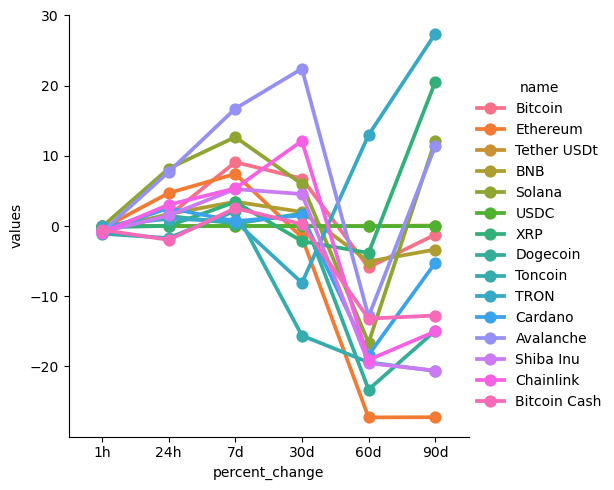

In [75]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [76]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,63455.37308,2024-09-20 17:09:55.101263


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

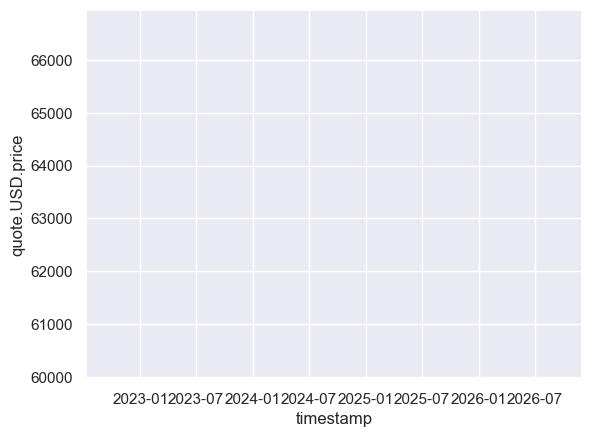

In [78]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)